In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce


In [2]:
data = pd.read_csv('../data/processed/data.csv')
data.head()

Country  Happiness Rank  Happiness Score  GDP/C  Family  Health  \
0      finland               1            7.769  1.340   1.587   0.986   
1      denmark               2            7.600  1.383   1.573   0.996   
2       norway               3            7.554  1.488   1.582   1.028   
3      iceland               4            7.494  1.380   1.624   1.026   
4  netherlands               5            7.488  1.396   1.522   0.999   

   Freedom  Government Corruption  Generosity  Year  
0    0.596                  0.393       0.153  2019  
1    0.592                  0.410       0.252  2019  
2    0.603                  0.341       0.271  2019  
3    0.591                  0.118       0.354  2019  
4    0.557                  0.298       0.322  2019

    Country  Happiness Rank_first  Happiness Rank_last  Rank_change
137   benin                   155                  102           53




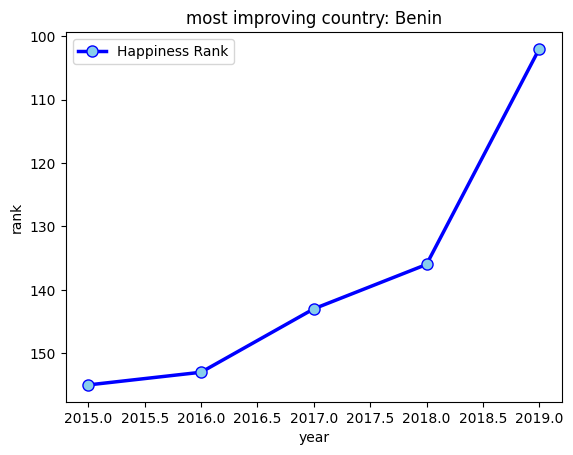

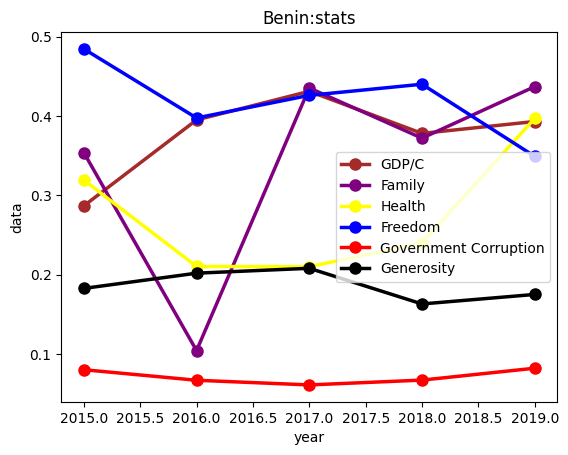

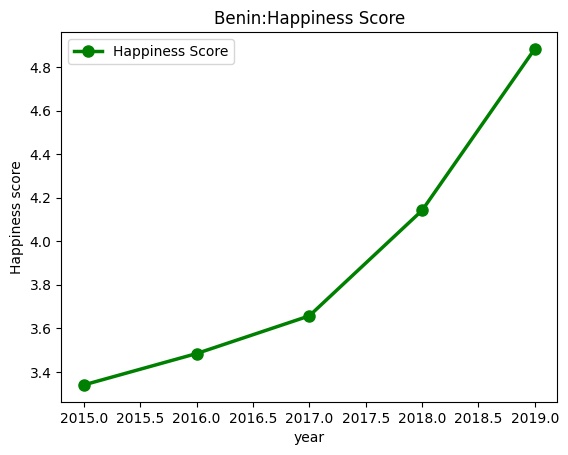



average rank change of all countries excluding benin :  2.3642857142857143




Text(0, 0.5, 'Stats')

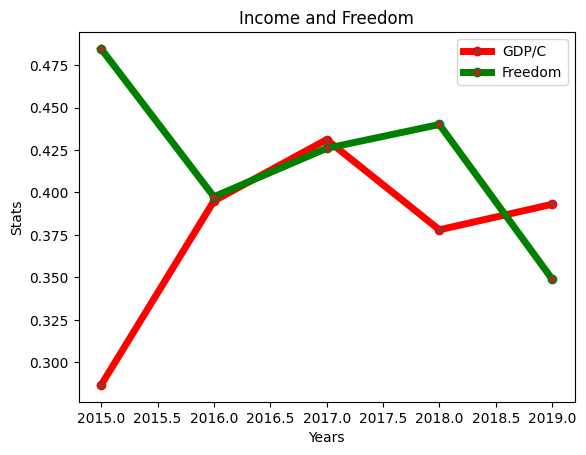

In [3]:
# 1 Which country’s happiness rank has improved the most in the last 5 years?

#finding first year , last year
first_year = data['Year'].min()
last_year = data['Year'].max()
#extracting rank of countries in first year , last year
first_year_ranks = data.loc[data['Year']==first_year,['Country','Happiness Rank']]
last_year_ranks = data.loc[data['Year']==last_year,['Country','Happiness Rank']]
#creating simple 3 column 141 row dataframe
rank_change = pd.merge(first_year_ranks,last_year_ranks , on='Country' ,how='inner',suffixes = ('_first','_last'))
#calculating difference negative means decreased rank
rank_change['Rank_change']= rank_change['Happiness Rank_first'] - rank_change['Happiness Rank_last']
#calculating country with most improvement
most_improved_country = rank_change.sort_values('Rank_change' , ascending=False).head(1)
print(most_improved_country)
print('\n')

#plotting benin data
benin_data = data[data['Country']=='benin']
benin_data = benin_data.sort_values(by='Year')

#happiness rank
benin_data.plot(
                'Year' ,
                'Happiness Rank' ,
                marker='o' ,
                color='blue',
                linewidth=2.5 ,
                markersize=8 ,
                markerfacecolor='skyblue'
                )
plt.title('most improving country: Benin')
plt.xlabel('year')
plt.ylabel('rank')
plt.gca().invert_yaxis()
plt.show()

#other statistics of benin
benin_data.plot(
                'Year' ,
                 ['GDP/C' ,'Family','Health','Freedom','Government Corruption','Generosity'] ,
                marker='o' ,
                color=['brown','purple','yellow','blue','red','black'],
                linewidth=2.5 ,
                markersize=8 ,
                )
plt.title('Benin:stats')
plt.xlabel('year')
plt.ylabel('data')
plt.show()

#happiness score of benin
benin_data.plot(
                'Year' ,
                 ['Happiness Score'] ,
                marker='o' ,
                color=['green'],
                linewidth=2.5 ,
                markersize=8 ,
                )
plt.title('Benin:Happiness Score')
plt.xlabel('year')
plt.ylabel('Happiness score')
plt.show()

#average change in rank of ther countries over 5 years
country_rank_start = data.loc[data['Year']==first_year , ['Country' , 'Happiness Rank']]
country_rank_end = data.loc[data['Year']==last_year , ['Country' , 'Happiness Rank']]
#excluding benin
country_rank_start = country_rank_start[country_rank_start['Country']!='benin']
country_rank_end = country_rank_end[country_rank_end['Country']!='benin']
#combining both ears rank daa
country_rank_change = country_rank_start.merge(country_rank_end , on='Country' , suffixes=('_start','_end'))
#calculation net rank change 0=same rank , positive = rank increased ,example  1=1rank value increase
country_rank_change['Rank_change'] = country_rank_change['Happiness Rank_start'] - country_rank_change['Happiness Rank_end']
print('\n')
#average of all rank changes
average_rank_change_of_world = country_rank_change['Rank_change'].mean()
print('average rank change of all countries excluding benin : ' , average_rank_change_of_world)
print('\n')

#relation between benin income and freedom
benin_data.plot('Year' , ['GDP/C','Freedom'] , color=['red' , 'green'] ,marker='o' ,markerfacecolor='brown', linewidth=5)
plt.title('Income and Freedom')
plt.xlabel('Years')
plt.ylabel('Stats')

# 1 Which country’s happiness rank has improved the most in the last 5 years?

1) Out of all the other countries `Benin is the most improved Country` in terms of Happiness.From 155th to 102nd place, Benin transformed over 5 years.

2) The increase in rank of Benin is not the result of downfall of other countries because
   despite the fact that the `Average rank of all other countries increased by 2.364` ,Benin has still shown exponential 
   growth in Happiness score and ranking and the rate of growth increases constantly.

3) `Best two years of growth for Benin being (2019) followed by the previous year (2018)` , It was not just Happiness, People      were also getting Healthier , and extreamely supportive being the fittest by the end of 2019 over the period of past 5        years.

4) It sounds natural and can be seen in the data that freedom of the people of Benin shrinks as they start to grow finantially however support of their families and their social circle seems to be of a big relief(2016-2017).

   
([4] is only a prediction from the graph , later I learned and used co-relation below for qiestion 2)

In [4]:
# 2 Which country’s happiness score dropped the most over the years, and why?

#although we can reuse some of the info previously calculated for practice I will calculate again
#preview of dataset
data.head()
#starting and ending year
sy = min(data['Year'])
ey = max(data['Year'])
print(sy , ey)
#extracting country whose Happiness score went down them most
scores_s = data.loc[data['Year']==sy , ['Country','Happiness Score']]
scores_e = data.loc[data['Year']==ey , ['Country','Happiness Score']]
scores = scores_s.merge(scores_e , on='Country' , suffixes=('_s','_e'))
scores.head()
scores['Change'] = scores['Happiness Score_e']-scores['Happiness Score_s']
scores.sort_values('Change' , ascending=True ,inplace=True)
print('country whose Happiness Score declined the most','\n','\n',scores.head(1))
#venezuela is the country whose score went down the most 
venezuela = data[data['Country']=='venezuela']
# print(venezuela)


2015 2019
country whose Happiness Score declined the most 
 
       Country  Happiness Score_s  Happiness Score_e  Change
21  venezuela               6.81              4.707  -2.103


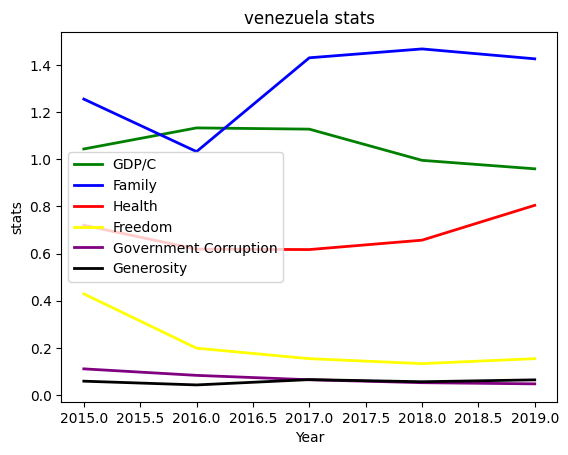

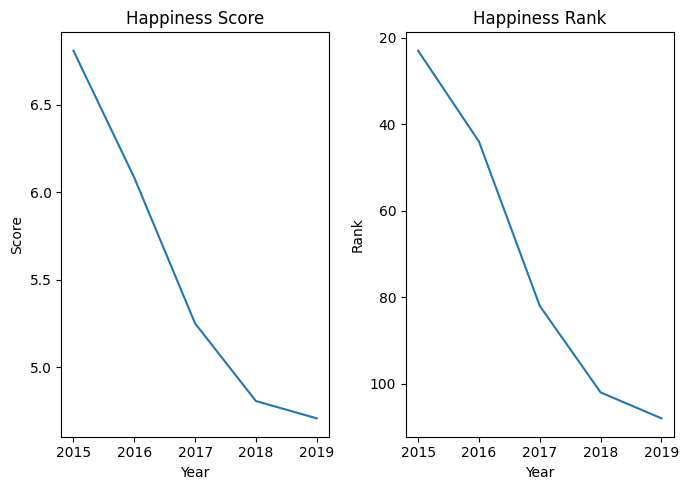

co-relation of other factors(venezuela) with happiness score  

Happiness Score          1.000000
GDP/C                    0.466209
Family                  -0.716183
Health                  -0.176659
Freedom                  0.888098
Government Corruption    0.994718
Generosity              -0.416465
Name: Happiness Score, dtype: float64


In [5]:

#line plot seems to be a good choice to get a quick visual of the data above 

stats=['GDP/C','Family','Health','Freedom',
   'Government Corruption','Generosity'
  ]
color=['green','blue','red','yellow','purple','black']
venezuela.plot('Year' , stats , color=color , linewidth=2)
plt.title('venezuela stats')
plt.xlabel('Year')
plt.ylabel('stats')
plt.show()

fig , axs = plt.subplots(1,2,figsize=(7,5))

axs[0].plot(venezuela['Year'] , venezuela['Happiness Score'])
axs[0].set_title('Happiness Score')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Score')

axs[1].plot(venezuela['Year'] , venezuela['Happiness Rank'])
axs[1].set_title('Happiness Rank')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Rank')
axs[1].invert_yaxis()
plt.tight_layout()
plt.show()

# why the score went down?
contributing_factors= venezuela[['Happiness Score','GDP/C','Family','Health','Freedom','Government Corruption','Generosity']]
print('co-relation of other factors(venezuela) with happiness score ','\n')
print(contributing_factors.corr()['Happiness Score'])

In [6]:
# Government Corruption positive: because this dataset 
# actually measures “perception of lack of corruption” (higher = less corruption).
# So the positive correlation is expected.

#the venezuela dataframe is extremely small so it cant be trusted with corelation 
#we will try to calculate using entire dataset

contributing_factors= data[['Happiness Score','GDP/C','Family','Health','Freedom','Government Corruption','Generosity']]

print('co-relation of other factors(all countries) with happiness score ','\n')
print(contributing_factors.corr()['Happiness Score'])

co-relation of other factors(all countries) with happiness score  

Happiness Score          1.000000
GDP/C                    0.796553
Family                   0.652672
Health                   0.746618
Freedom                  0.547451
Government Corruption    0.432841
Generosity               0.135260
Name: Happiness Score, dtype: float64


      Insights

The strongest drivers of happiness worldwide are:

# 1 GDP per Capita (wealth) (0.796553)

# 2 Health (life expectancy) (0.746618)

# 3 Family support (0.652672)

Followed by

# Freedom (0.547451)

# Perception of Lack of Corruption (0.432841)

Generosity has very little affect (0.135)

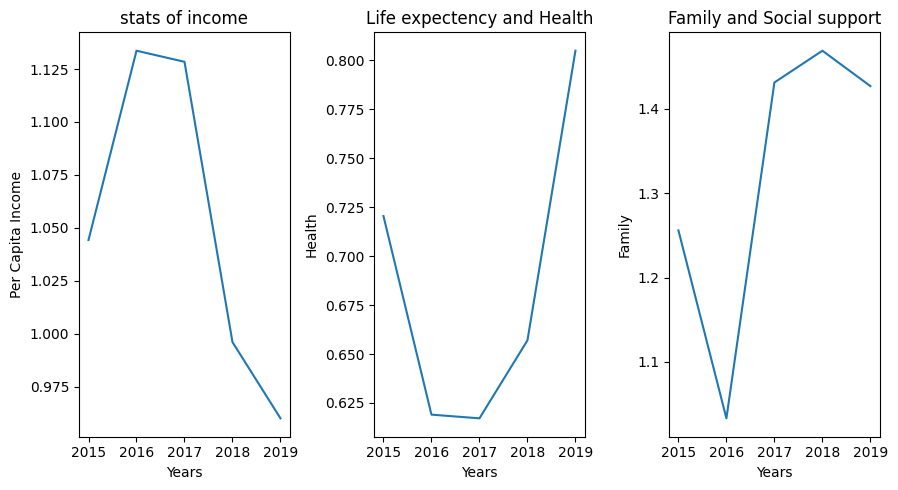

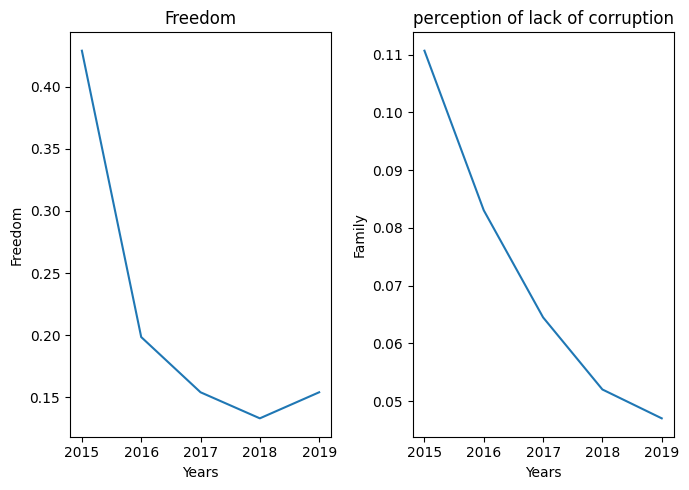

In [7]:
#now that we know what factors affect happiness score the most lets see how they were
#for venezuela

# income , health , family
fig , axs = plt.subplots(1 , 3 , figsize=(9,5))

axs[0].plot(venezuela['Year'],venezuela['GDP/C'])
axs[0].set_title('stats of income')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Per Capita Income')

axs[1].plot(venezuela['Year'],venezuela['Health'])
axs[1].set_title('Life expectency and Health')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Health')

axs[2].plot(venezuela['Year'],venezuela['Family'])
axs[2].set_title('Family and Social support')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Family')
plt.tight_layout()
plt.show()

#freedom , corruption 
fig , axs = plt.subplots(1 , 2 , figsize=(7,5))

axs[0].plot(venezuela['Year'],venezuela['Freedom'])
axs[0].set_title('Freedom')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Freedom')

axs[1].plot(venezuela['Year'],venezuela['Government Corruption'])
axs[1].set_title('perception of lack of corruption')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Family')
plt.tight_layout()
plt.show()

# 2 Which country’s happiness score dropped the most over the years, and why?

Venezuela is the country whose Happiness Score Dropped the most.

BECAUSE

At first the `INCOME increased a little` however despite it being largest contributor in happiness the other factors like `HEALTH , FAMILY SUPPORT , FREEDOM ,and PERCEPTION OF LACK OF CORRUPTION all went down simultaneously` causing fall in Happiness Score

Later when the `HEALTH of people and FAMILY SUPPORT was getting better` the most important factor `INCOME crashed drastically` and on top of that `FREEDOM and people's PERCEPTION OF LACK OF CORRUPTION continued to decline` down which made the Happiness Score keep falling down .


Top 10 Countries:ordered  

 0        denmark
1         norway
2        iceland
3        finland
4    switzerland
5    netherlands
6         canada
7    new zealand
8         sweden
Name: Country, dtype: object


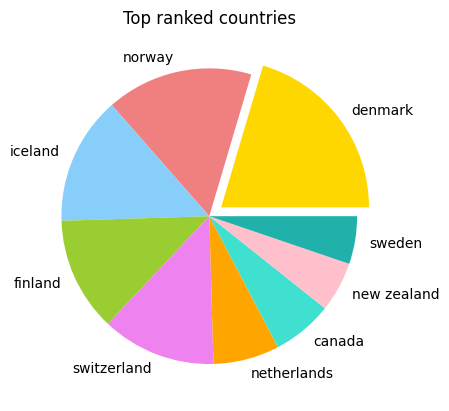

In [8]:
#3 Are there countries that have stayed in the Top 10 for all years? 
#Who are the “consistent champions”?

#finding all the unique years
years=data['Year'].unique()
# print(years)
# print('\n','\n')

#extracting top 10 for each year
top_10=[]
for i in years:
    temp = data[(data['Year']==i )& (data['Happiness Rank']<=10) ] [['Country' , 'Happiness Rank','Year']]
    top_10.append(temp)
    
# for i in top_10:
#     print(i)
#     print('\n','\n')

#finding common countries
result = reduce(lambda left,right: pd.merge(left,right,on='Country',how='inner',suffixes=('', '_drop')),top_10)

result = result[['Country','Happiness Rank']]
# print('Countries that stayed in top 10 throughout the years','\n','\n')
# print(result)
# print('\n','\n')


#which country dominated the most 

#calculating sum of rank of the top countries for the five years(more = less dominant)
rank_sum=[]
for i in result['Country']:
    temp=data.groupby('Country')['Happiness Rank'].sum().loc[i]
    rank_sum.append(temp)

#inverting the values 1/x so (more = more dominant easier to understand)
best=[]
for i in rank_sum:
    temp=1/i
    best.append(temp)


# scaling the values so they add upto 100  , ax + bx = 100 => x=100/(a+b)  =>scaling factor

#scaling factor
scaling_value = (100/sum(best))
# print('scaling factor',scaling_value,'\n\n')

#scaling
best_scaled =list(map(lambda element:element*scaling_value , best))

#total
# print('sum:',sum(best_scaled),'\n\n')

result['Domination score']=best_scaled

result.sort_values(by='Domination score',ascending=False,inplace=True)
result_Names=result['Country']
result_Names=result_Names.reset_index(drop='True')
print('Top 10 Countries:ordered ','\n\n',result_Names)

#visualization
color = ["gold","lightcoral","lightskyblue","yellowgreen","violet","orange","turquoise","pink","lightseagreen"]
exp=[0.1]+[0]*8
plt.pie(result['Domination score'],labels=result['Country'],colors=color,explode=exp)
plt.title('Top ranked countries')
plt.show()

# 3 Are there countries that have stayed in the Top 10 for all years? Who are the “consistent champions”?

1) The Countries above are the consistent champions 

2) Their domination in the top 10 section can be seen by the size in the pie chart 

3) Denmark has overall best rank.


In [9]:
#4 Who’s the biggest “underdog” — a country 
#that was once in the bottom half but moved to the top half?

# I will find countries that were brlow half till final year and then , what countries are common in the final year in the upper half

final_year = data['Year'].max()
#i calculated total countries =141 so half ~ 71

#this will select any country that had rank higher than 71 before final year
countries_lower_half = data[(data['Happiness Rank']>71)&(data['Year']!=final_year)]
#this will select countries that have rank smaller than 71 in the final year
countries_upper_half = data[(data['Happiness Rank']<71)&(data['Year']==final_year)]
# finding common countries
common = countries_upper_half.merge(countries_lower_half , how = 'inner' , on='Country' , suffixes=('','_drop'))
#removing duplicates and selecting names only
common = common['Country'].unique()
print(common)

['kosovo' 'romania' 'latvia' 'estonia' 'jamaica' 'honduras' 'hungary'
 'portugal' 'pakistan' 'philippines' 'serbia']


### 4 Who’s the biggest “underdog” — a country that was once in the bottom half but moved to the top half?

These are the countries that were once in the lower half but ended up being in the upper half section -

* Kosovo 
* Romania 
* Latvia 
* Estonia  
* Jamaica 
* Honduras 
* Hungary 
* Portugal 
* Pakistan 
* Philippines
* Serbia

   Country
0  burundi
1    syria
2   rwanda


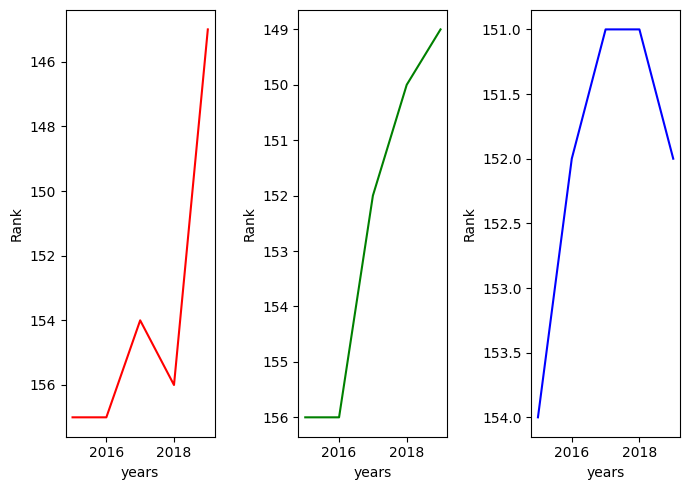

In [39]:
#5 Is there a country that was always in the bottom 10, no matter the year?

#list of years
years = data['Year'].unique()
section = len(years)

#extracting seperate year data
sad_countries=[]
for i in years:
    
    sad = data[data['Year']==i]
    sad_countries.append(sad)

#filtering bottom 10 and selecting only name column
for i in range(0 , section):
    sad_countries[i] = sad_countries[i].tail(10)
    sad_countries[i] = sad_countries[i]['Country']

#finding common countries throughout the 5 years
result = reduce(lambda left , right : pd.merge(left,right,on='Country',how='inner'),sad_countries)

print(result)

#visualization 
burundi = data[data['Country']=='burundi']
syria = data[data['Country']=='syria']
rwanda = data[data['Country']=='rwanda']

fig , axs = plt.subplots(1,3,figsize=(7,5))

axs[0].plot(years , burundi['Happiness Rank'] , color='red')
axs[0].set_xlabel('years')
axs[0].set_ylabel('Rank')
axs[0].invert_yaxis()


axs[1].plot(years , syria['Happiness Rank'] , color='green')
axs[1].set_xlabel('years')
axs[1].set_ylabel('Rank')
axs[1].invert_yaxis()


axs[2].plot(years , rwanda['Happiness Rank'] , color='blue')
axs[2].set_xlabel('years')
axs[2].set_ylabel('Rank')
axs[2].invert_yaxis()
plt.tight_layout()

plt.show()

### 5 Is there a country that was always in the bottom 10, no matter the year?

These three Countries stayed in the bottom 10 list 

* Burundi
* Syria
* Rwanda

Rank is calculated based on entire countries happiness score , some have same rank some are left out hence the data is not symmetric for all 5 years  however , I have decided not to sort it or assign a 1 to 141 series to Rank column because it would make it accurate for this dataframe but considering each and every signle country it would be inaccurate .


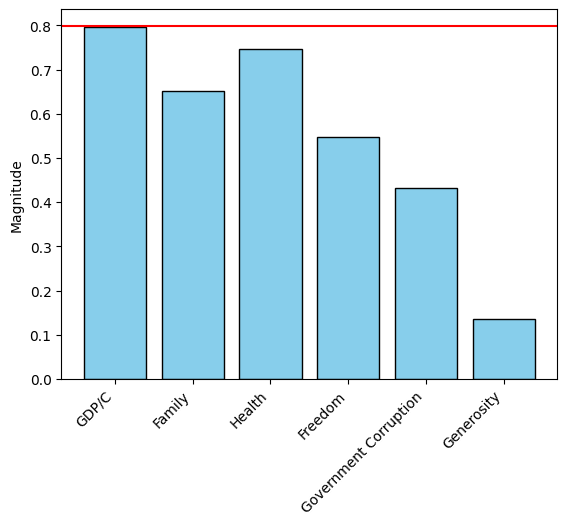

<Figure size 640x480 with 0 Axes>

In [58]:
#6 Does GDP per capita have a stronger effect on happiness than social support?

# I have already calculated the co-relation between what factor has what affect on happiness (happiness score)

corr = contributing_factors.corr()['Happiness Score']

corr = corr.drop('Happiness Score')

plt.bar(corr.index,corr.values,color='skyblue',edgecolor='black')
plt.xticks(rotation=45,ha='right')
plt.axhline(y=0.799,color='red')
plt.ylabel('Magnitude')
plt.show()
plt.tight_layout()
# print(corr)

### #6 Does GDP per capita have a stronger effect on happiness than social support?


GDP is the most importnt factor when it comes to happiness , however even health has a stronger affect on happiness than Family(Social Support)

### 7 Which factor correlates most with happiness — GDP, health, freedom, generosity, or lact of corruption perception?

* GDP

###  Is there a “sweet spot” GDP level beyond which happiness doesn’t increase much?
  